<a href="https://colab.research.google.com/github/TZajas/CS4287-Projects/blob/main/CS4287_Prj1_20278748_20251874.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS4278 MLP Project**

In [2]:
# Tomasz Zajas: 20278748
# Farran Haley: 20251874
# Runs: bool

In [4]:
# Importing necessary libraries
from IPython.display import display

# For processing dataset
import numpy as np
import pandas as pd

# For plotting dataset and model
import seaborn as sb
import matplotlib.pyplot as plt

# For creating and training model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout

# For cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Dataset Exploration and Visualisation

In [5]:
# Reading the dataset using the pandas library
dataset_path = 'water_potability.csv'
df = pd.read_csv(dataset_path)

In [6]:
# Displaying the first few rows of the dataset
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
# Displaying the statistics of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
# Displaying the shape of the data, 10 features and 3276 samples
df.shape

(3276, 10)

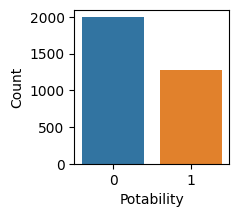

0    1998
1    1278
Name: Potability, dtype: int64


In [9]:
# Displaying the difference in volume between potabale and non-potable rows
plt.figure(figsize=(2, 2))

sb.countplot(data=df, x='Potability')
plt.ylabel('Count')
plt.show()

# Displaying the exact count of potable and non-potable rows
potability_counts = df['Potability'].value_counts()
print(potability_counts)

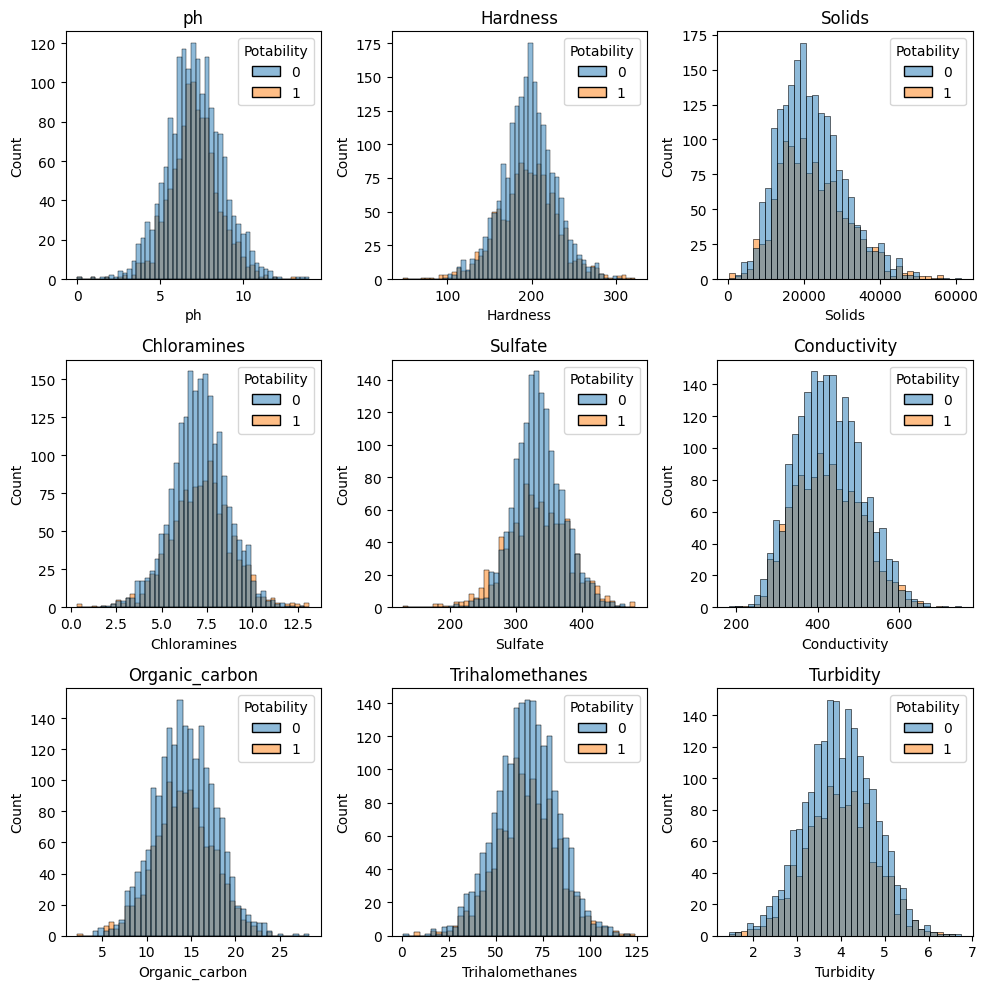

In [10]:
# Visualises the distribution of the numerical value with respect to Potability(target variable)
num=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
fig = plt.figure(figsize=(10,10))

for i in range(len(num)):
    plt.subplot(3,3,i+1)
    plt.title(num[i])
    sb.histplot(data=df,x=df[num[i]],hue='Potability')
plt.tight_layout()
plt.show()


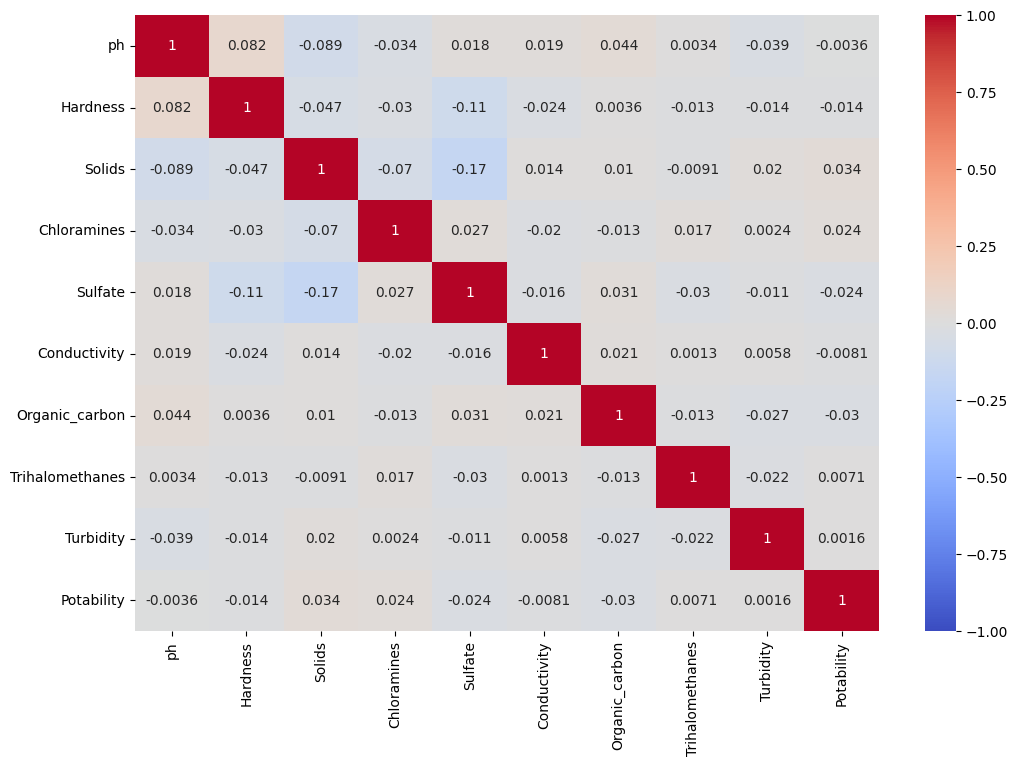

In [11]:
# Correlation Plot
plt.figure(figsize=(12, 8))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Data Preprocessing and Normalization

In [12]:
# Displaying how many values are missing from the dataset
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [13]:
# Filling in missing values with mean values
meansval = df["ph"].mean()
df["ph"].fillna(meansval, inplace = True)

meansval = df["Sulfate"].mean()
df["Sulfate"].fillna(meansval, inplace = True)

meansval = df["Trihalomethanes"].mean()
df["Trihalomethanes"].fillna(meansval, inplace = True)

In [14]:
# No missing values
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [15]:
# Splitting the dataset into inputs(X) and targets(Y)
Y = df['Potability']
X = df.drop(columns=['Potability'])

# Splitting inputs and outputs into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Import StandardScaler for normalising the data
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Normalise the inputs using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Definition

In [16]:
# Displaying the split data dimensions
display(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# Setting input dimension
input_dim = X_train.shape[1]

(2293, 9)

(2293,)

(983, 9)

(983,)

In [17]:
# Defining hyperparameters
EPOCHS = 500
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2
OPTIMISER = 'adam'
LOSS_FUNCTION = 'binary_crossentropy'

In [18]:
from keras.callbacks import EarlyStopping

# Defining the model
model = Sequential(name='multilayer_perceptron')

# Adding Input, Hidden and Output Layers
model.add(Dense(128, activation='relu', input_shape=(input_dim,), name='input_layer'))
model.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model.add(Dense(64, activation='relu', name='hidden_layer_1'))
model.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model.add(Dense(1, activation='sigmoid', name='output_layer'))  # Binary classification with a sigmoid activation function

# Compiling the model
# Adam chosen as the optimiser
# Binary_crossentropy as the loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss=LOSS_FUNCTION, metrics=['accuracy'])

# Displaying summary of model
model.summary()


Model: "multilayer_perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               1280      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [19]:
# Fitting the model with specified hyperparameters
results = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/500
115/115 [==============================] - 2s 4ms/step - loss: 0.6963 - accuracy: 0.5229 - val_loss: 0.6820 - val_accuracy: 0.5948
Epoch 2/500
115/115 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5523 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 3/500
115/115 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5872 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 4/500
115/115 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5769 - val_loss: 0.6762 - val_accuracy: 0.5948
Epoch 5/500
115/115 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5965 - val_loss: 0.6761 - val_accuracy: 0.5948
Epoch 6/500
115/115 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.5894 - val_loss: 0.6758 - val_accuracy: 0.5948
Epoch 7/500
115/115 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.6003 - val_loss: 0.6757 - val_accuracy: 0.5948

### Evaluating Model Performance

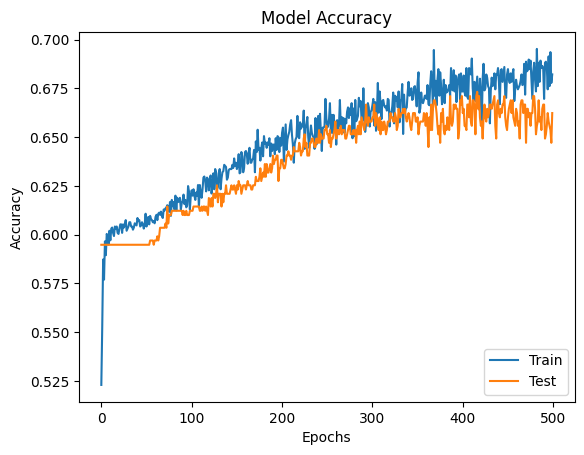

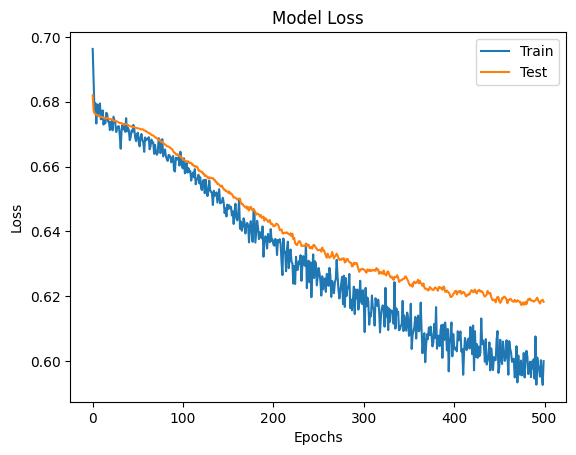

31/31 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6775


In [20]:
# Extract training accuracy and loss values
training_accuracy = results.history['accuracy']
training_loss = results.history['loss']

# Extract validation accuracy and loss values
validation_accuracy = results.history['val_accuracy']
validation_loss = results.history['val_loss']

# Plotting model accuracy
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Test"], loc="lower right")
plt.show()

# summarize history for loss
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# K-Fold Cross Validation

In [21]:
# Define K for K-Fold cross validation
k = 20

# Initialise Cross Validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create a list to store the evaluated scores
scores = []

# Loop through each fold 'k' times
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

  # Fit the data to the model
  model.fit(X_train, Y_train)
  # Make Predictions
  Y_pred = model.predict(X_test)

  mse = mean_squared_error(Y_test, Y_pred)
  scores.append(mse)

avg_score = np.mean(scores)
print(f'Average Mean Squared Error: {avg_score}')

6/6 [==============================] - 0s 2ms/step
Average Mean Squared Error: 0.29304859802566796
